Synthetic data

## Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, datasets

## Functions

In [14]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    return 1/(1+np.exp(-z))

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    error = -labels*np.log(predictions) - (1-labels)*np.log(1-predictions)

    cost = np.sum(error)/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns) # number of features

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot((predictions-labels), features) # Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr*gradient # Write down the update rule here

    return weights

def decision_boundary(prob):
    if prob >= 0.4:
        return 1
    elif prob >= 0.7:
        return -1
    else:
        return 0
    
    # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return '{}%'.format(np.round((1.0 - (float(np.count_nonzero(diff)) / len(diff)))*100, 2))

## Data

In [15]:
data = datasets.make_classification(n_samples = 1000, n_classes = 3, n_clusters_per_class = 1, n_features = 2, n_redundant=0, n_repeated=0)
X = pd.DataFrame(data[0], columns = ['Feature_1', 'Feature_2'])
y = data[1]

In [16]:
# features = ['age', 'fnlwgt', 'education_num']
# X = data[features] # Features
# label_encoder = preprocessing.LabelEncoder()
# y = label_encoder.fit_transform(data.income) # Target labels

In [17]:
# scale = preprocessing.StandardScaler()
# X = pd.DataFrame(scale.fit_transform(X), columns=features)

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
train_data = []
for i in np.unique(y_train) :
    temp = np.zeros(len(y_train))
    temp[np.where(y_train == i)] = 1
    train_data.append(temp)

In [20]:
test_data = []
for i in np.unique(y_test) :
    temp = np.zeros(len(y_test))
    temp[np.where(y_test == i)] = 1
    test_data.append(temp)

In [22]:
# Initialize the weights
weights = []
losses = []
for i in train_data:
    wts = np.random.normal(0, 1, len(X_train.columns))
    # Training
    optimal_wts, loss = train(X_train, y_train, wts, 1e-5, 1000)
    weights.append(optimal_wts)
    losses.append(loss)

iter: 0 cost: 0.4688912770980447
iter: 1 cost: 0.468599936534296
iter: 2 cost: 0.4683093106694859
iter: 3 cost: 0.468019396989326
iter: 4 cost: 0.4677301929905937
iter: 5 cost: 0.46744169618107617
iter: 6 cost: 0.4671539040795165
iter: 7 cost: 0.4668668142155585
iter: 8 cost: 0.4665804241296929
iter: 9 cost: 0.4662947313732033
iter: 10 cost: 0.46600973350811253
iter: 11 cost: 0.4657254281071291
iter: 12 cost: 0.46544181275359436
iter: 13 cost: 0.4651588850414294
iter: 14 cost: 0.4648766425750825
iter: 15 cost: 0.46459508296947694
iter: 16 cost: 0.46431420384995903
iter: 17 cost: 0.46403400285224583
iter: 18 cost: 0.46375447762237415
iter: 19 cost: 0.4634756258166492
iter: 20 cost: 0.46319744510159316
iter: 21 cost: 0.46291993315389535
iter: 22 cost: 0.46264308766036044
iter: 23 cost: 0.4623669063178596
iter: 24 cost: 0.46209138683327966
iter: 25 cost: 0.46181652692347347
iter: 26 cost: 0.461542324315211
iter: 27 cost: 0.46126877674512956
iter: 28 cost: 0.4609958819596851
iter: 29 cost:

iter: 944 cost: 0.3429589434490421
iter: 945 cost: 0.34289892572440295
iter: 946 cost: 0.34283897954317355
iter: 947 cost: 0.3427791047829312
iter: 948 cost: 0.3427193013215323
iter: 949 cost: 0.3426595690371112
iter: 950 cost: 0.3425999078080796
iter: 951 cost: 0.3425403175131262
iter: 952 cost: 0.3424807980312153
iter: 953 cost: 0.3424213492415862
iter: 954 cost: 0.3423619710237527
iter: 955 cost: 0.342302663257502
iter: 956 cost: 0.3422434258228938
iter: 957 cost: 0.3421842586002603
iter: 958 cost: 0.3421251614702041
iter: 959 cost: 0.3420661343135988
iter: 960 cost: 0.3420071770115872
iter: 961 cost: 0.3419482894455814
iter: 962 cost: 0.34188947149726134
iter: 963 cost: 0.3418307230485742
iter: 964 cost: 0.3417720439817339
iter: 965 cost: 0.34171343417922
iter: 966 cost: 0.3416548935237776
iter: 967 cost: 0.34159642189841544
iter: 968 cost: 0.3415380191864063
iter: 969 cost: 0.3414796852712858
iter: 970 cost: 0.3414214200368514
iter: 971 cost: 0.34136322336716207
iter: 972 cost: 0.

iter: 886 cost: 0.39035264872434594
iter: 887 cost: 0.39022450377373175
iter: 888 cost: 0.3900965451296605
iter: 889 cost: 0.389968772469591
iter: 890 cost: 0.3898411854715766
iter: 891 cost: 0.38971378381426436
iter: 892 cost: 0.38958656717689366
iter: 893 cost: 0.38945953523929544
iter: 894 cost: 0.3893326876818911
iter: 895 cost: 0.3892060241856907
iter: 896 cost: 0.3890795444322933
iter: 897 cost: 0.38895324810388415
iter: 898 cost: 0.3888271348832349
iter: 899 cost: 0.38870120445370193
iter: 900 cost: 0.3885754564992254
iter: 901 cost: 0.38844989070432834
iter: 902 cost: 0.38832450675411484
iter: 903 cost: 0.3881993043342704
iter: 904 cost: 0.3880742831310593
iter: 905 cost: 0.38794944283132443
iter: 906 cost: 0.3878247831224861
iter: 907 cost: 0.3877003036925407
iter: 908 cost: 0.38757600423005995
iter: 909 cost: 0.3874518844241896
iter: 910 cost: 0.3873279439646485
iter: 911 cost: 0.3872041825417274
iter: 912 cost: 0.38708059984628823
iter: 913 cost: 0.38695719556976277
iter: 91

iter: 816 cost: 0.4437160733806314
iter: 817 cost: 0.44350302456992424
iter: 818 cost: 0.443290365921342
iter: 819 cost: 0.44307809645649143
iter: 820 cost: 0.44286621520014663
iter: 821 cost: 0.44265472118023624
iter: 822 cost: 0.4424436134278309
iter: 823 cost: 0.4422328909771305
iter: 824 cost: 0.44202255286545195
iter: 825 cost: 0.4418125981332163
iter: 826 cost: 0.44160302582393696
iter: 827 cost: 0.4413938349842067
iter: 828 cost: 0.4411850246636859
iter: 829 cost: 0.4409765939150899
iter: 830 cost: 0.4407685417941773
iter: 831 cost: 0.44056086735973743
iter: 832 cost: 0.4403535696735786
iter: 833 cost: 0.44014664780051566
iter: 834 cost: 0.43994010080835894
iter: 835 cost: 0.4397339277679013
iter: 836 cost: 0.4395281277529071
iter: 837 cost: 0.4393226998400999
iter: 838 cost: 0.4391176431091514
iter: 839 cost: 0.43891295664266883
iter: 840 cost: 0.4387086395261842
iter: 841 cost: 0.4385046908481423
iter: 842 cost: 0.4383011096998893
iter: 843 cost: 0.43809789517566144
iter: 844 

In [23]:
weights

[array([-0.29532257,  1.24348348]),
 array([-0.62481617,  1.05108335]),
 array([-0.50080826,  0.80866412])]

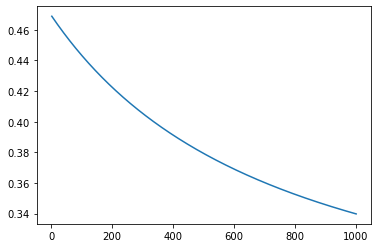

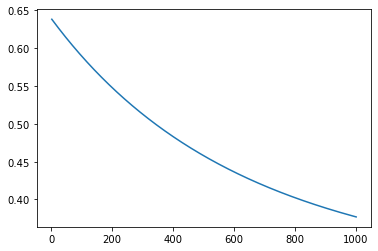

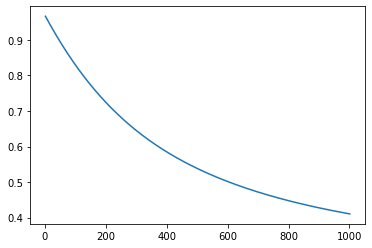

In [24]:
# Plot the loss against the number of epochs
for loss in losses:
    plt.plot(np.arange(1, len(loss)+1, 1), loss)
    plt.show()

In [25]:
train_predictions = []
for wt in weights:
    pred = []
    for elem in predict(X_train, optimal_wts):
        pred.append(decision_boundary(elem))
    train_predictions.append(pred)
test_predictions = []
for wt in weights:
    pred = []
    for elem in predict(X_test, optimal_wts):
        pred.append(decision_boundary(elem))
    test_predictions.append(pred)

In [12]:
# # # Plot the decision boundary for two features. For that, we will assign a color to each
# # # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X['Feature_1'].min() - 0.5, X['Feature_1'].max() + 0.5
# y_min, y_max = X['Feature_2'].min() - 0.5, X['Feature_2'].max() + 0.5
# h = 0.02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts)
# mesh_preds = []
# for elem in probs:
#     mesh_preds.append(decision_boundary(elem))
# Z = np.array(mesh_preds)
# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(12, 5))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading = 'auto')

# plt.scatter(X['Feature_1'], X['Feature_2'], c=y, edgecolors="k", cmap=plt.cm.Paired)
# plt.xlabel("age")
# plt.ylabel("education_num")
# plt.title('Gradient Descent')
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())
# plt.show()

In [26]:
# Accuracy
for i in range(len(np.unique(y_train))):
    print("Traning accuracy using gradient descent: {}".format(accuracy(train_predictions[i], train_data[i])))
    print("Testing accuracy using gradient descent: {}".format(accuracy(test_predictions[i], test_data[i])))

Traning accuracy using gradient descent: 49.5%
Testing accuracy using gradient descent: 49.5%
Traning accuracy using gradient descent: 17.25%
Testing accuracy using gradient descent: 16.0%
Traning accuracy using gradient descent: 75.88%
Testing accuracy using gradient descent: 79.5%


## Scikit-Learn module

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)

In [29]:
# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X['Feature_1'].min() - 0.5, X['Feature_1'].max() + 0.5
# y_min, y_max = X['Feature_2'].min() - 0.5, X['Feature_2'].max() + 0.5
# h = 0.02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z_lbfgs = clf_lbfgs.predict(np.c_[xx.ravel(), yy.ravel()])
# Z_newt = clf_newt.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z_lbfgs = Z_lbfgs.reshape(xx.shape)
# Z_newt = Z_newt.reshape(xx.shape)

# fig = plt.figure(figsize=(12, 10))

# ax1 = plt.subplot(2, 1, 1)
# ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired, shading = 'auto')

# # Plot also the training points
# ax1.scatter(X['Feature_1'], X['Feature_2'], c=y, edgecolors="k", cmap=plt.cm.Paired)
# ax1.set_xlabel("Feature_1")
# ax1.set_ylabel("Feature_2")

# ax1.set_xlim(xx.min(), xx.max())
# ax1.set_ylim(yy.min(), yy.max())
# ax1.set_title('L-BFGS')
# #ax1.set_xticks(())
# #ax1.set_yticks(())

# ax2 = plt.subplot(2, 1, 2)
# ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired, shading = 'gouraud')

# # Plot also the training points
# ax2.scatter(X['Feature_1'], X['Feature_2'], c=y, edgecolors="k", cmap=plt.cm.Paired)
# ax2.set_xlabel("Feature_1")
# ax2.set_ylabel("Feature_2")

# ax2.set_xlim(xx.min(), xx.max())
# ax2.set_ylim(yy.min(), yy.max())
# ax2.set_title('Newton-CG')
# #ax1.set_xticks(())
# #ax1.set_yticks(())
# plt.tight_layout()
# plt.show()

In [30]:
lbfgs_wt = clf_lbfgs.coef_
newt_wt = clf_newt.coef_

In [31]:
test_pred_lbfgs = []
for i in lbfgs_wt:
    predictions = []
    for elem in predict(X_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_lbfgs.append(predictions)

In [32]:
test_pred_newt = []
for i in newt_wt:
    predictions = []
    for elem in predict(X_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_newt.append(predictions)

In [35]:
# Accuracy
for i in range(len(np.unique(y_train))):
    print("Testing Accuracy using L-BFGS: {}".format(accuracy(test_pred_lbfgs[i], test_data[i])))
    print("Testing Accuracy using Newton-CG: {}".format(accuracy(test_pred_newt[i], test_data[i])))

Testing Accuracy using L-BFGS: 52.0%
Testing Accuracy using Newton-CG: 52.0%
Testing Accuracy using L-BFGS: 93.5%
Testing Accuracy using Newton-CG: 93.5%
Testing Accuracy using L-BFGS: 86.0%
Testing Accuracy using Newton-CG: 86.0%
